In [5]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Matplotlib is building the font cache; this may take a moment.


In [6]:
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [8]:
from google.colab import files
uploaded=files.upload()

ModuleNotFoundError: No module named 'google.colab'

In [12]:
# Load the Dataset
data=pd.read_excel(f"Churn.xlsx")

OSError: [Errno 22] Invalid argument

In [ ]:
data.head()

In [ ]:
# Check the shape of the dataset
data.shape


In [ ]:
# Check data types
data.info()


In [ ]:
# Check the missing values
data.isnull().sum()


In [8]:
#summary statistics
data.describe()


Unnamed: 0  account.length  voice.messages    intl.mins   intl.calls  \
count  5000.000000      5000.00000     5000.000000  5000.000000  5000.000000   
mean   2500.500000       100.25860        7.755200    10.261780     4.435200   
std    1443.520003        39.69456       13.546393     2.761396     2.456788   
min       1.000000         1.00000        0.000000     0.000000     0.000000   
25%    1250.750000        73.00000        0.000000     8.500000     3.000000   
50%    2500.500000       100.00000        0.000000    10.300000     4.000000   
75%    3750.250000       127.00000       17.000000    12.000000     6.000000   
max    5000.000000       243.00000       52.000000    20.000000    20.000000   

       intl.charge     day.mins    day.calls    eve.calls   eve.charge  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean      2.771196   180.288900   100.029400   100.191000    17.054322   
std       0.745514    53.894699    19.831197    19.826496     4.296843   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       2.300000   143.700000    87.000000    87.000000    14.140000   
50%       2.780000   180.100000   100.000000   100.000000    17.090000   
75%       3.240000   216.200000   113.000000   114.000000    19.900000   
max       5.400000   351.500000   165.000000   170.000000    30.910000   

        night.mins  night.calls  night.charge  customer.calls  
count  5000.000000  5000.000000   5000.000000     5000.000000  
mean    200.391620    99.919200      9.017732        1.570400  
std      50.527789    19.958686      2.273763        1.306363  
min       0.000000     0.000000      0.000000        0.000000  
25%     166.900000    87.000000      7.510000        1.000000  
50%     200.400000   100.000000      9.020000        1.000000  
75%     234.700000   113.000000     10.560000        2.000000  
max     395.000000   175.000000     17.770000        9.000000

In [9]:
numerical_columns=data.select_dtypes(include=['number']).columns
print("Numerical columns:",numerical_columns)

Numerical columns: Index(['Unnamed: 0', 'account.length', 'voice.messages', 'intl.mins',
       'intl.calls', 'intl.charge', 'day.mins', 'day.calls', 'eve.calls',
       'eve.charge', 'night.mins', 'night.calls', 'night.charge',
       'customer.calls'],
      dtype='object')


churn
no     85.86
yes    14.14
Name: proportion, dtype: float64


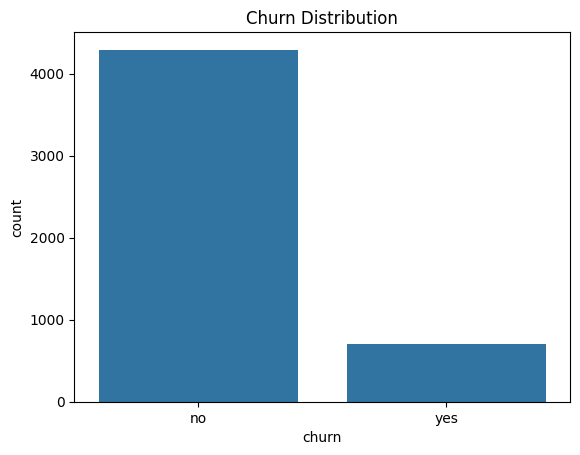

In [10]:
#Calculate churn rate
churn_rate = data['churn'].value_counts(normalize=True) * 100
print(churn_rate)

#Visualize churn distribution
sns.countplot(x='churn', data=data)
plt.title('Churn Distribution')
plt.show()


<Figure size 800x500 with 0 Axes>

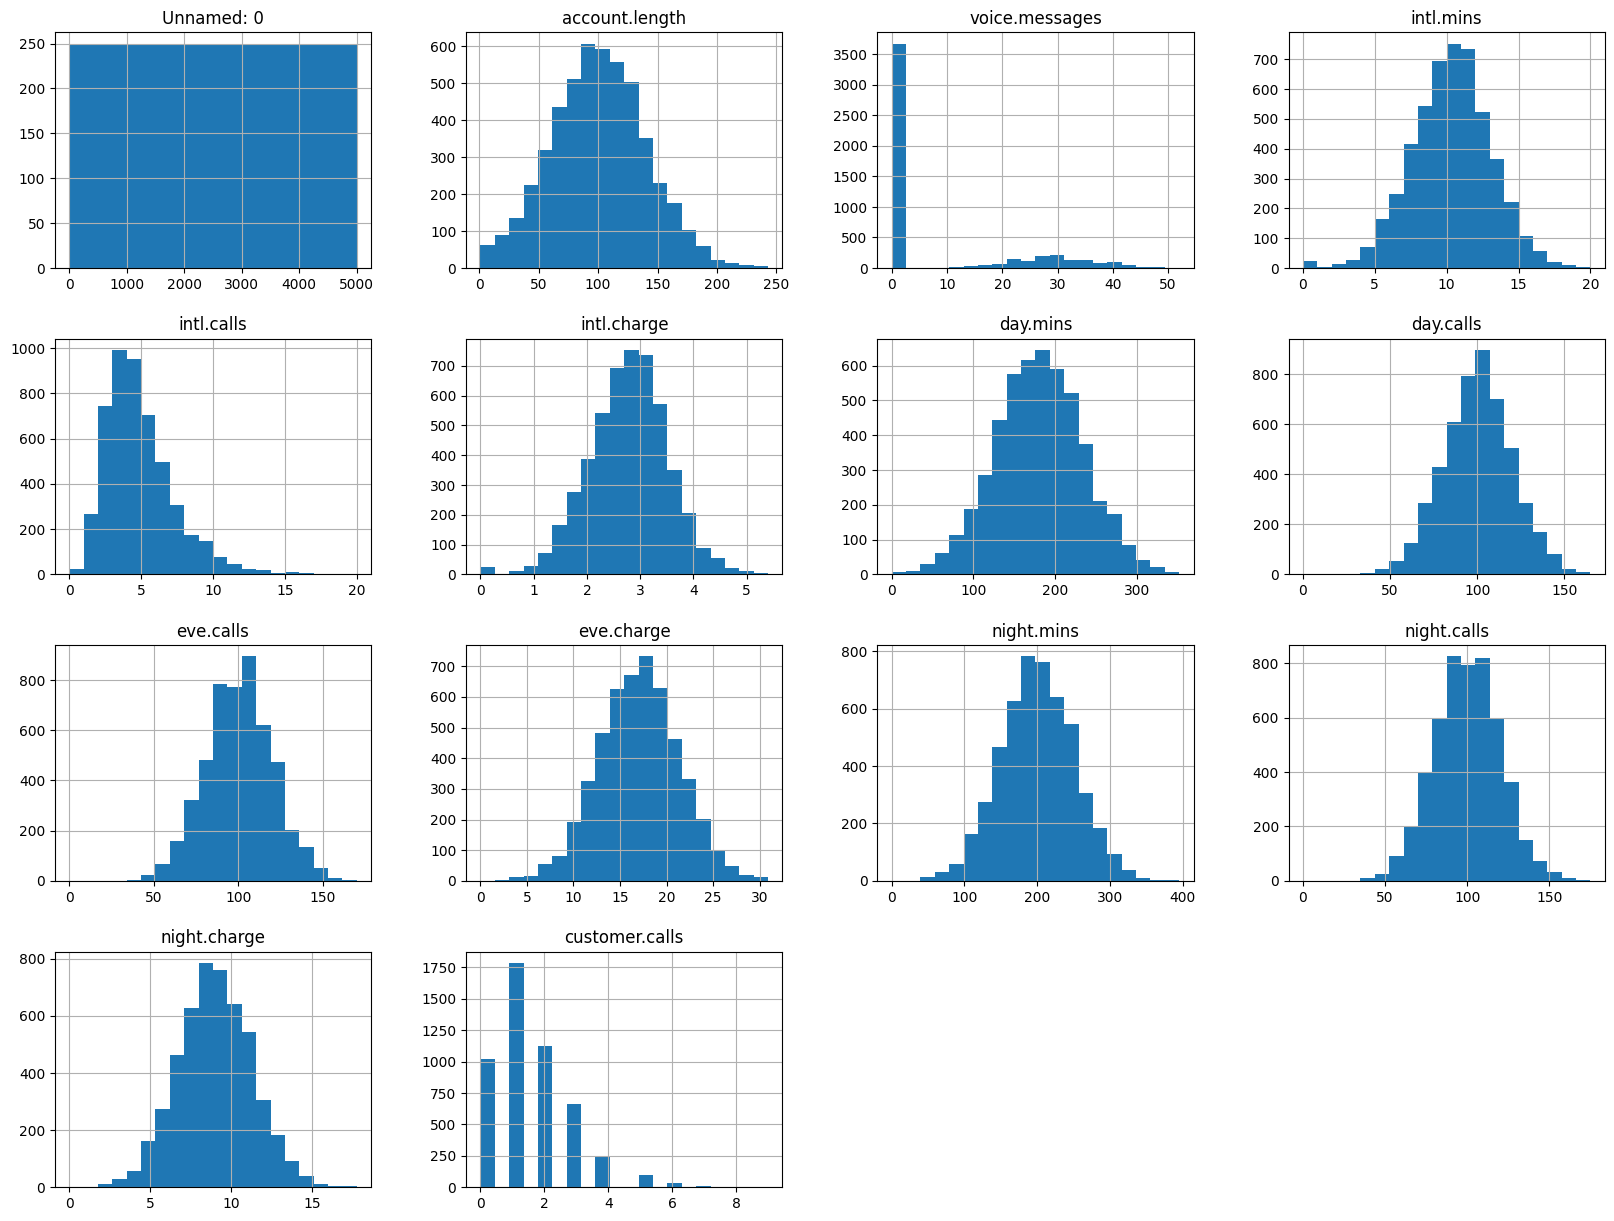

In [11]:
# Histograms of numerical columns
plt.figure(figsize=(8, 5))
import matplotlib.pyplot as plt
data[numerical_columns].hist(bins=20,figsize=(20,15))
plt.show()

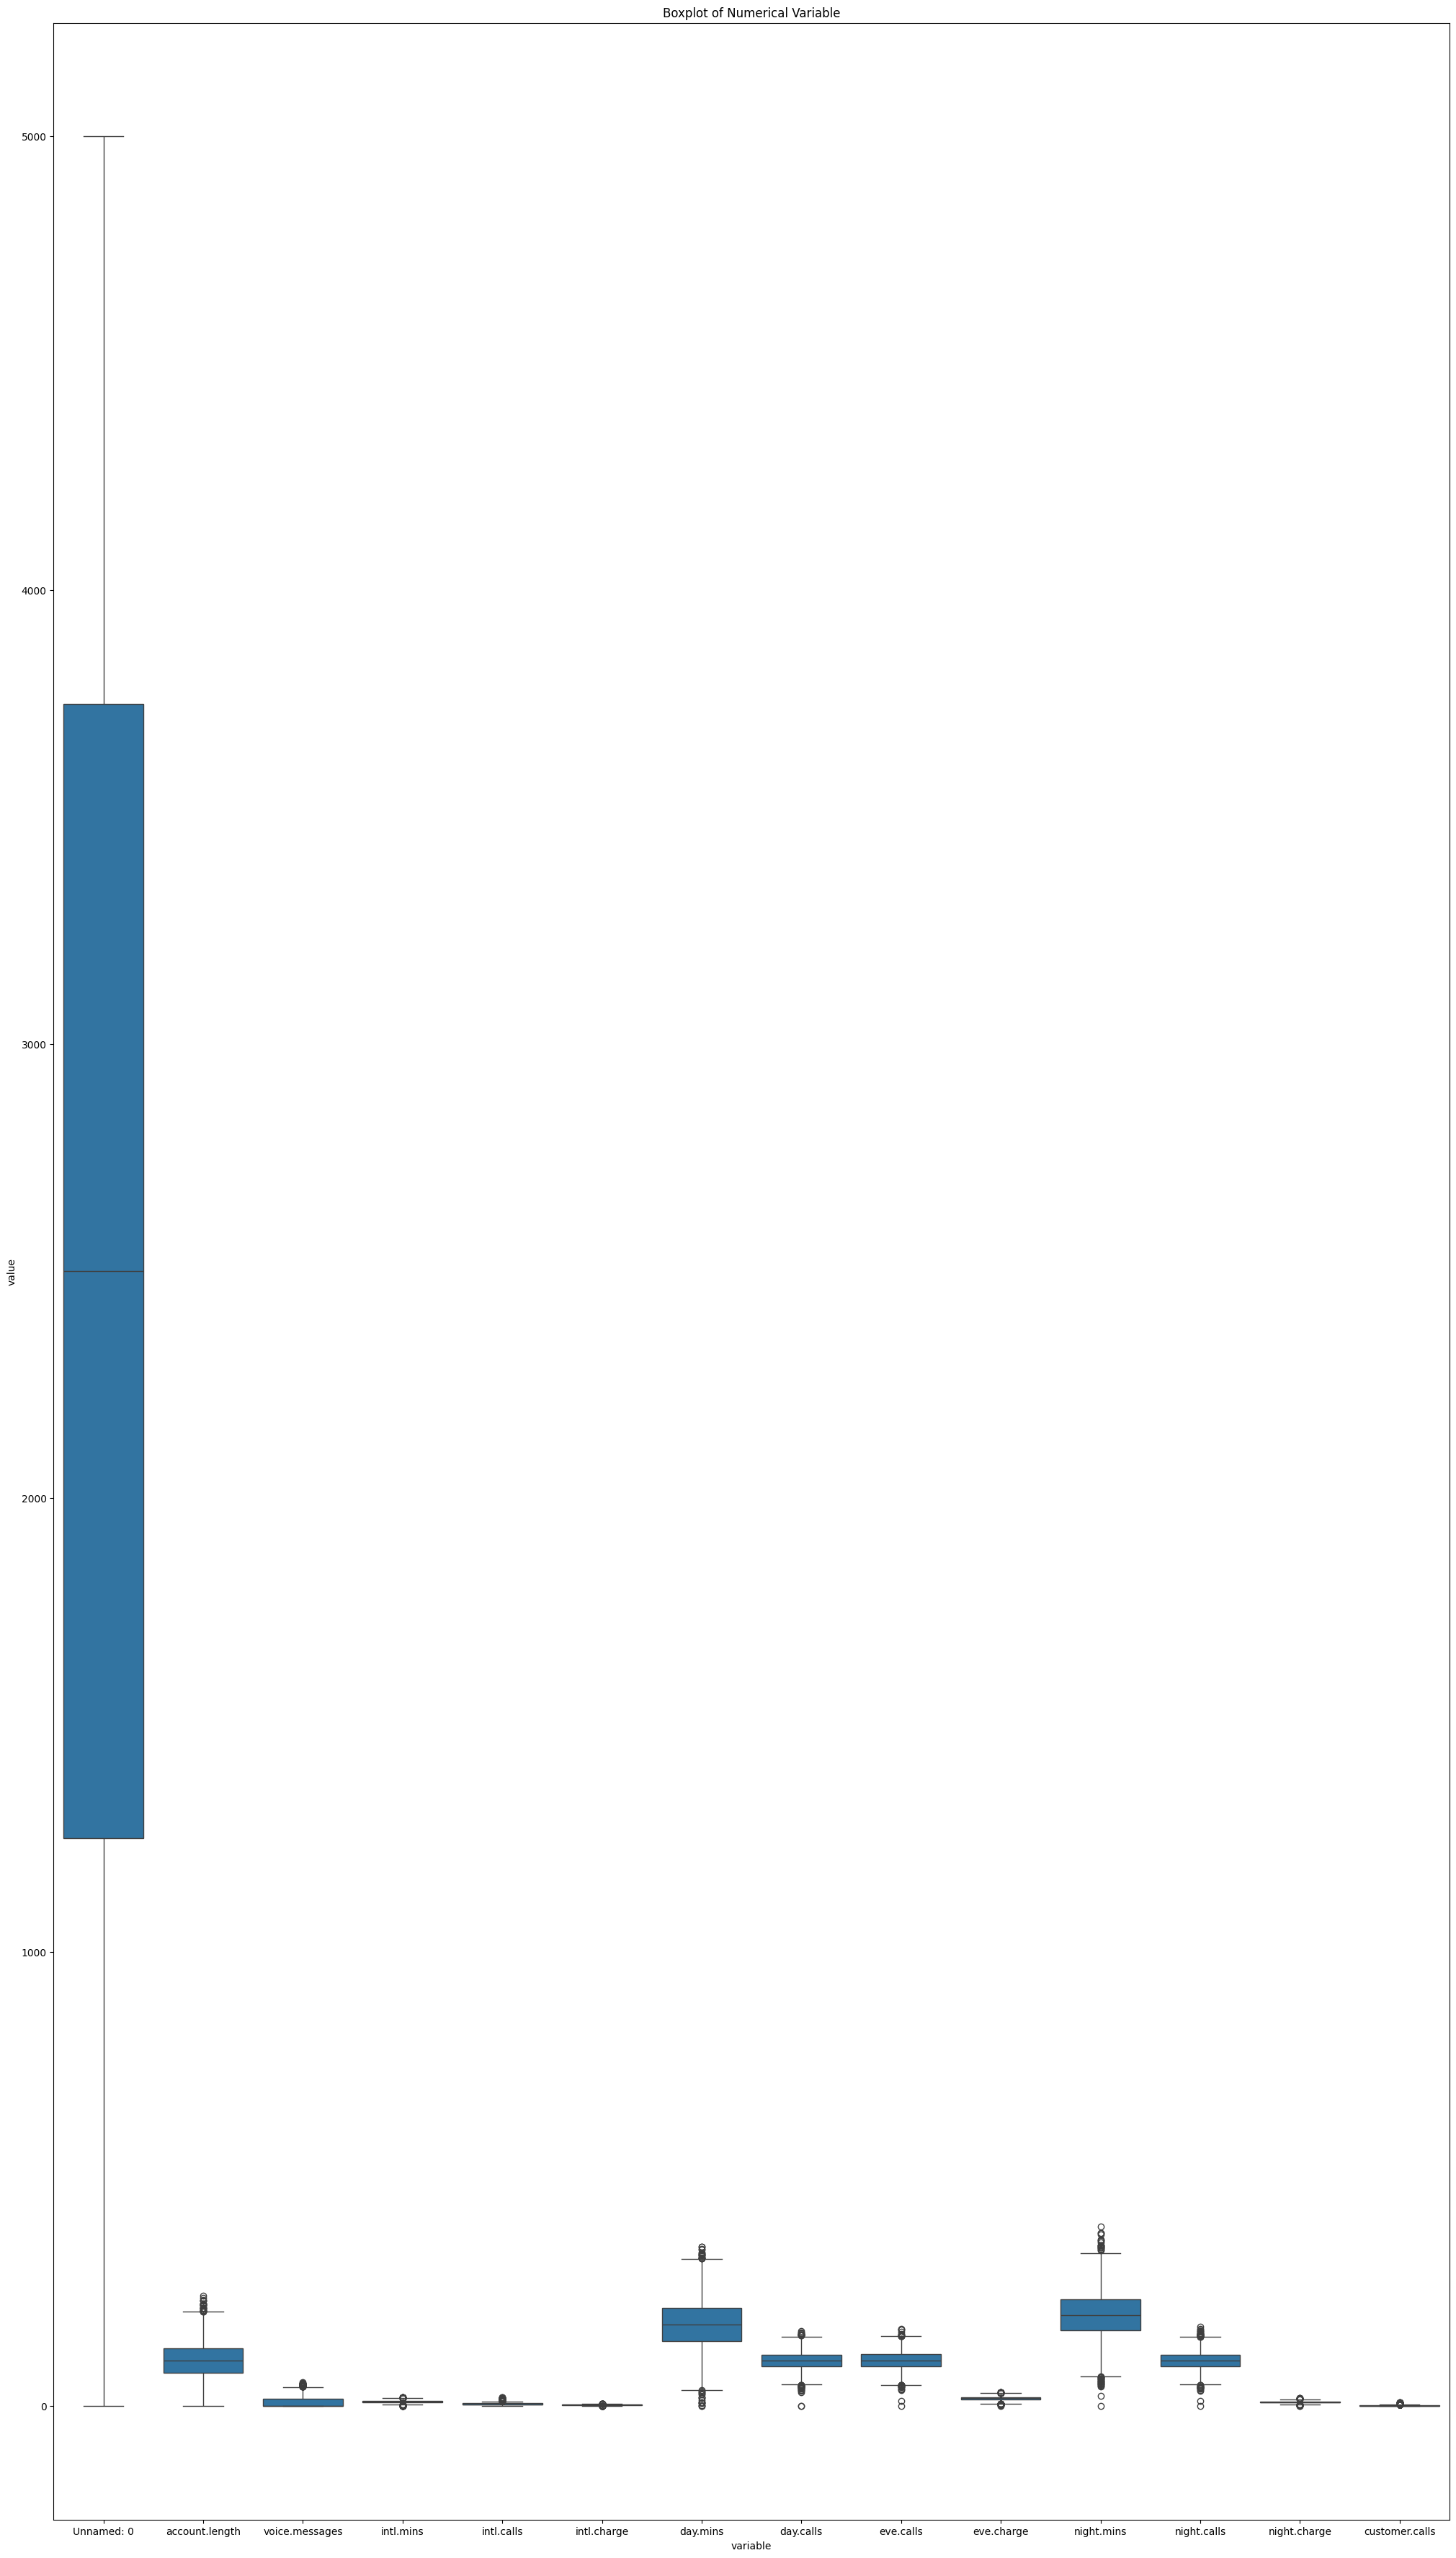

In [12]:
# Box plot of Numerical columns
plt.figure(figsize=(25,45))
sns.boxplot(x="variable", y="value", data=pd.melt(data[numerical_columns]))
plt.title('Boxplot of Numerical Variable')
plt.show()

categorical variable
      state      area.code voice.plan intl.plan day.charge eve.mins churn
0       KS  area_code_415        yes        no      45.07    197.4    no
1       OH  area_code_415        yes        no      27.47    195.5    no
2       NJ  area_code_415         no        no      41.38    121.2    no
3       OH  area_code_408         no       yes       50.9     61.9    no
4       OK  area_code_415         no       yes      28.34    148.3    no
...    ...            ...        ...       ...        ...      ...   ...
4995    HI  area_code_408        yes        no      40.07      223    no
4996    WV  area_code_415         no        no      31.31    256.8   yes
4997    DC  area_code_415         no        no       23.9    172.8    no
4998    DC  area_code_510         no        no       32.1    171.7    no
4999    VT  area_code_415        yes        no         22    267.1    no

[5000 rows x 7 columns]
Index(['state', 'area.code', 'voice.plan', 'intl.plan', 'day.charge',
       

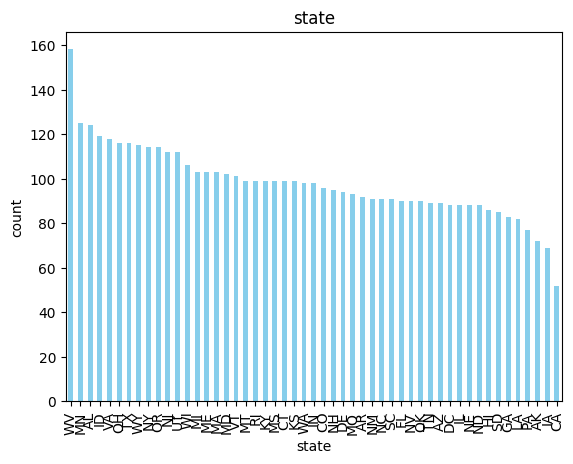

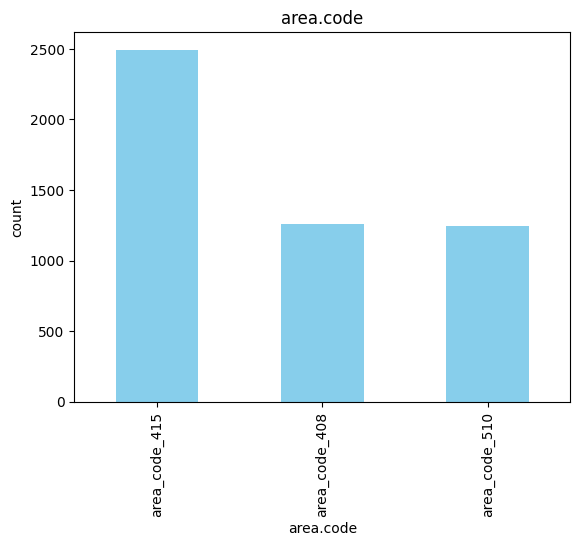

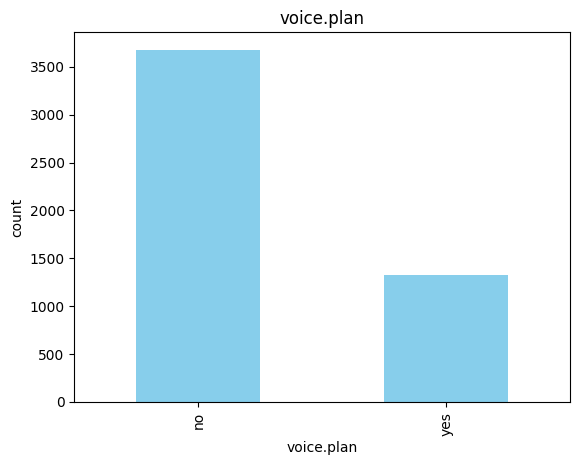

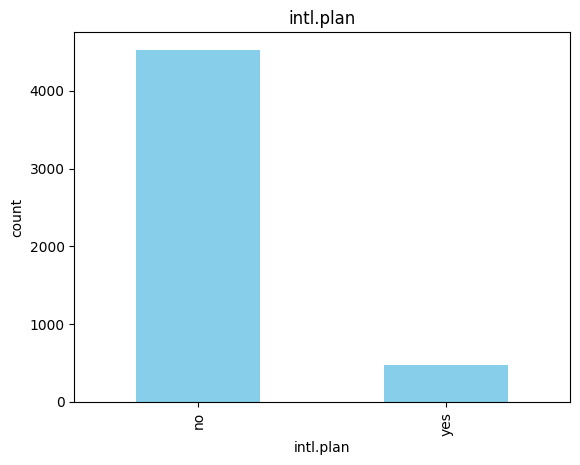

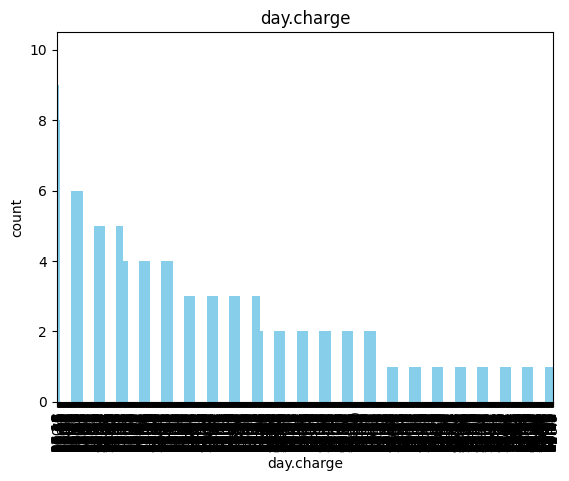

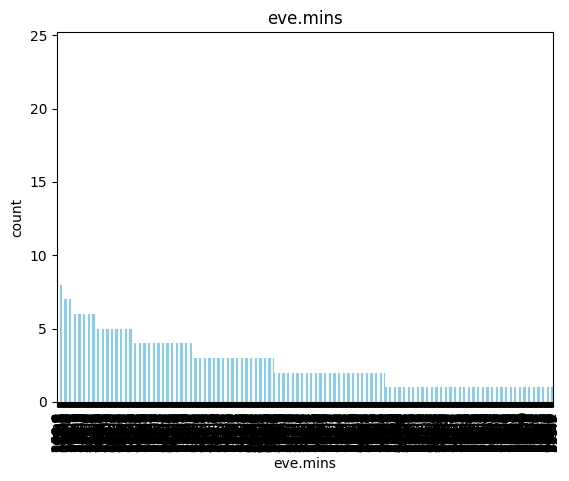

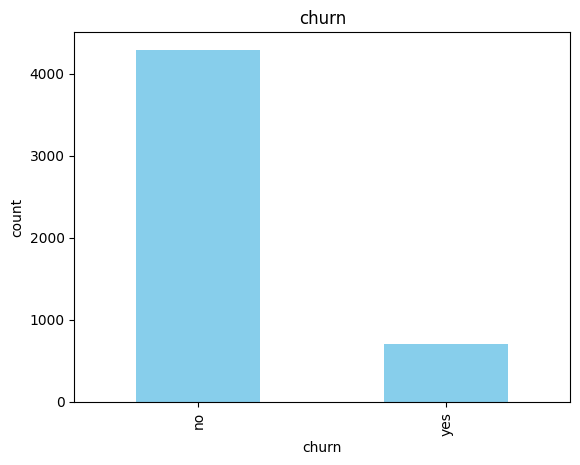

In [13]:
categorical_variable=data.select_dtypes(include=['object'])
print("categorical variable\n",categorical_variable)
print(categorical_variable.columns)
for column in categorical_variable:
    data[column].value_counts().plot(kind='bar',color=['skyblue'])
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('count')
    plt.show()


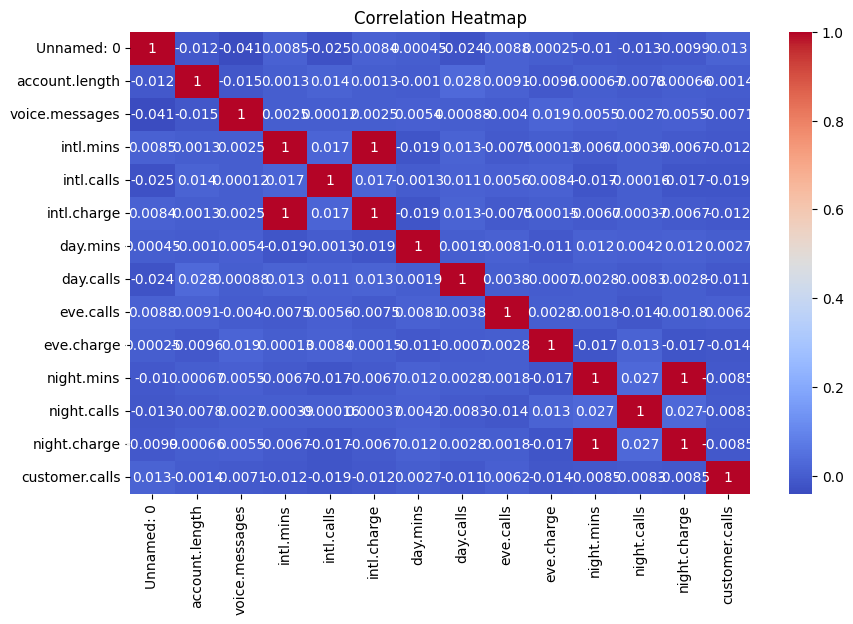

In [14]:
# Heatmap of numerical columns
numerical_columns = data.select_dtypes(include=['number'])
corr_matrix = numerical_columns.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<Figure size 1000x1500 with 0 Axes>

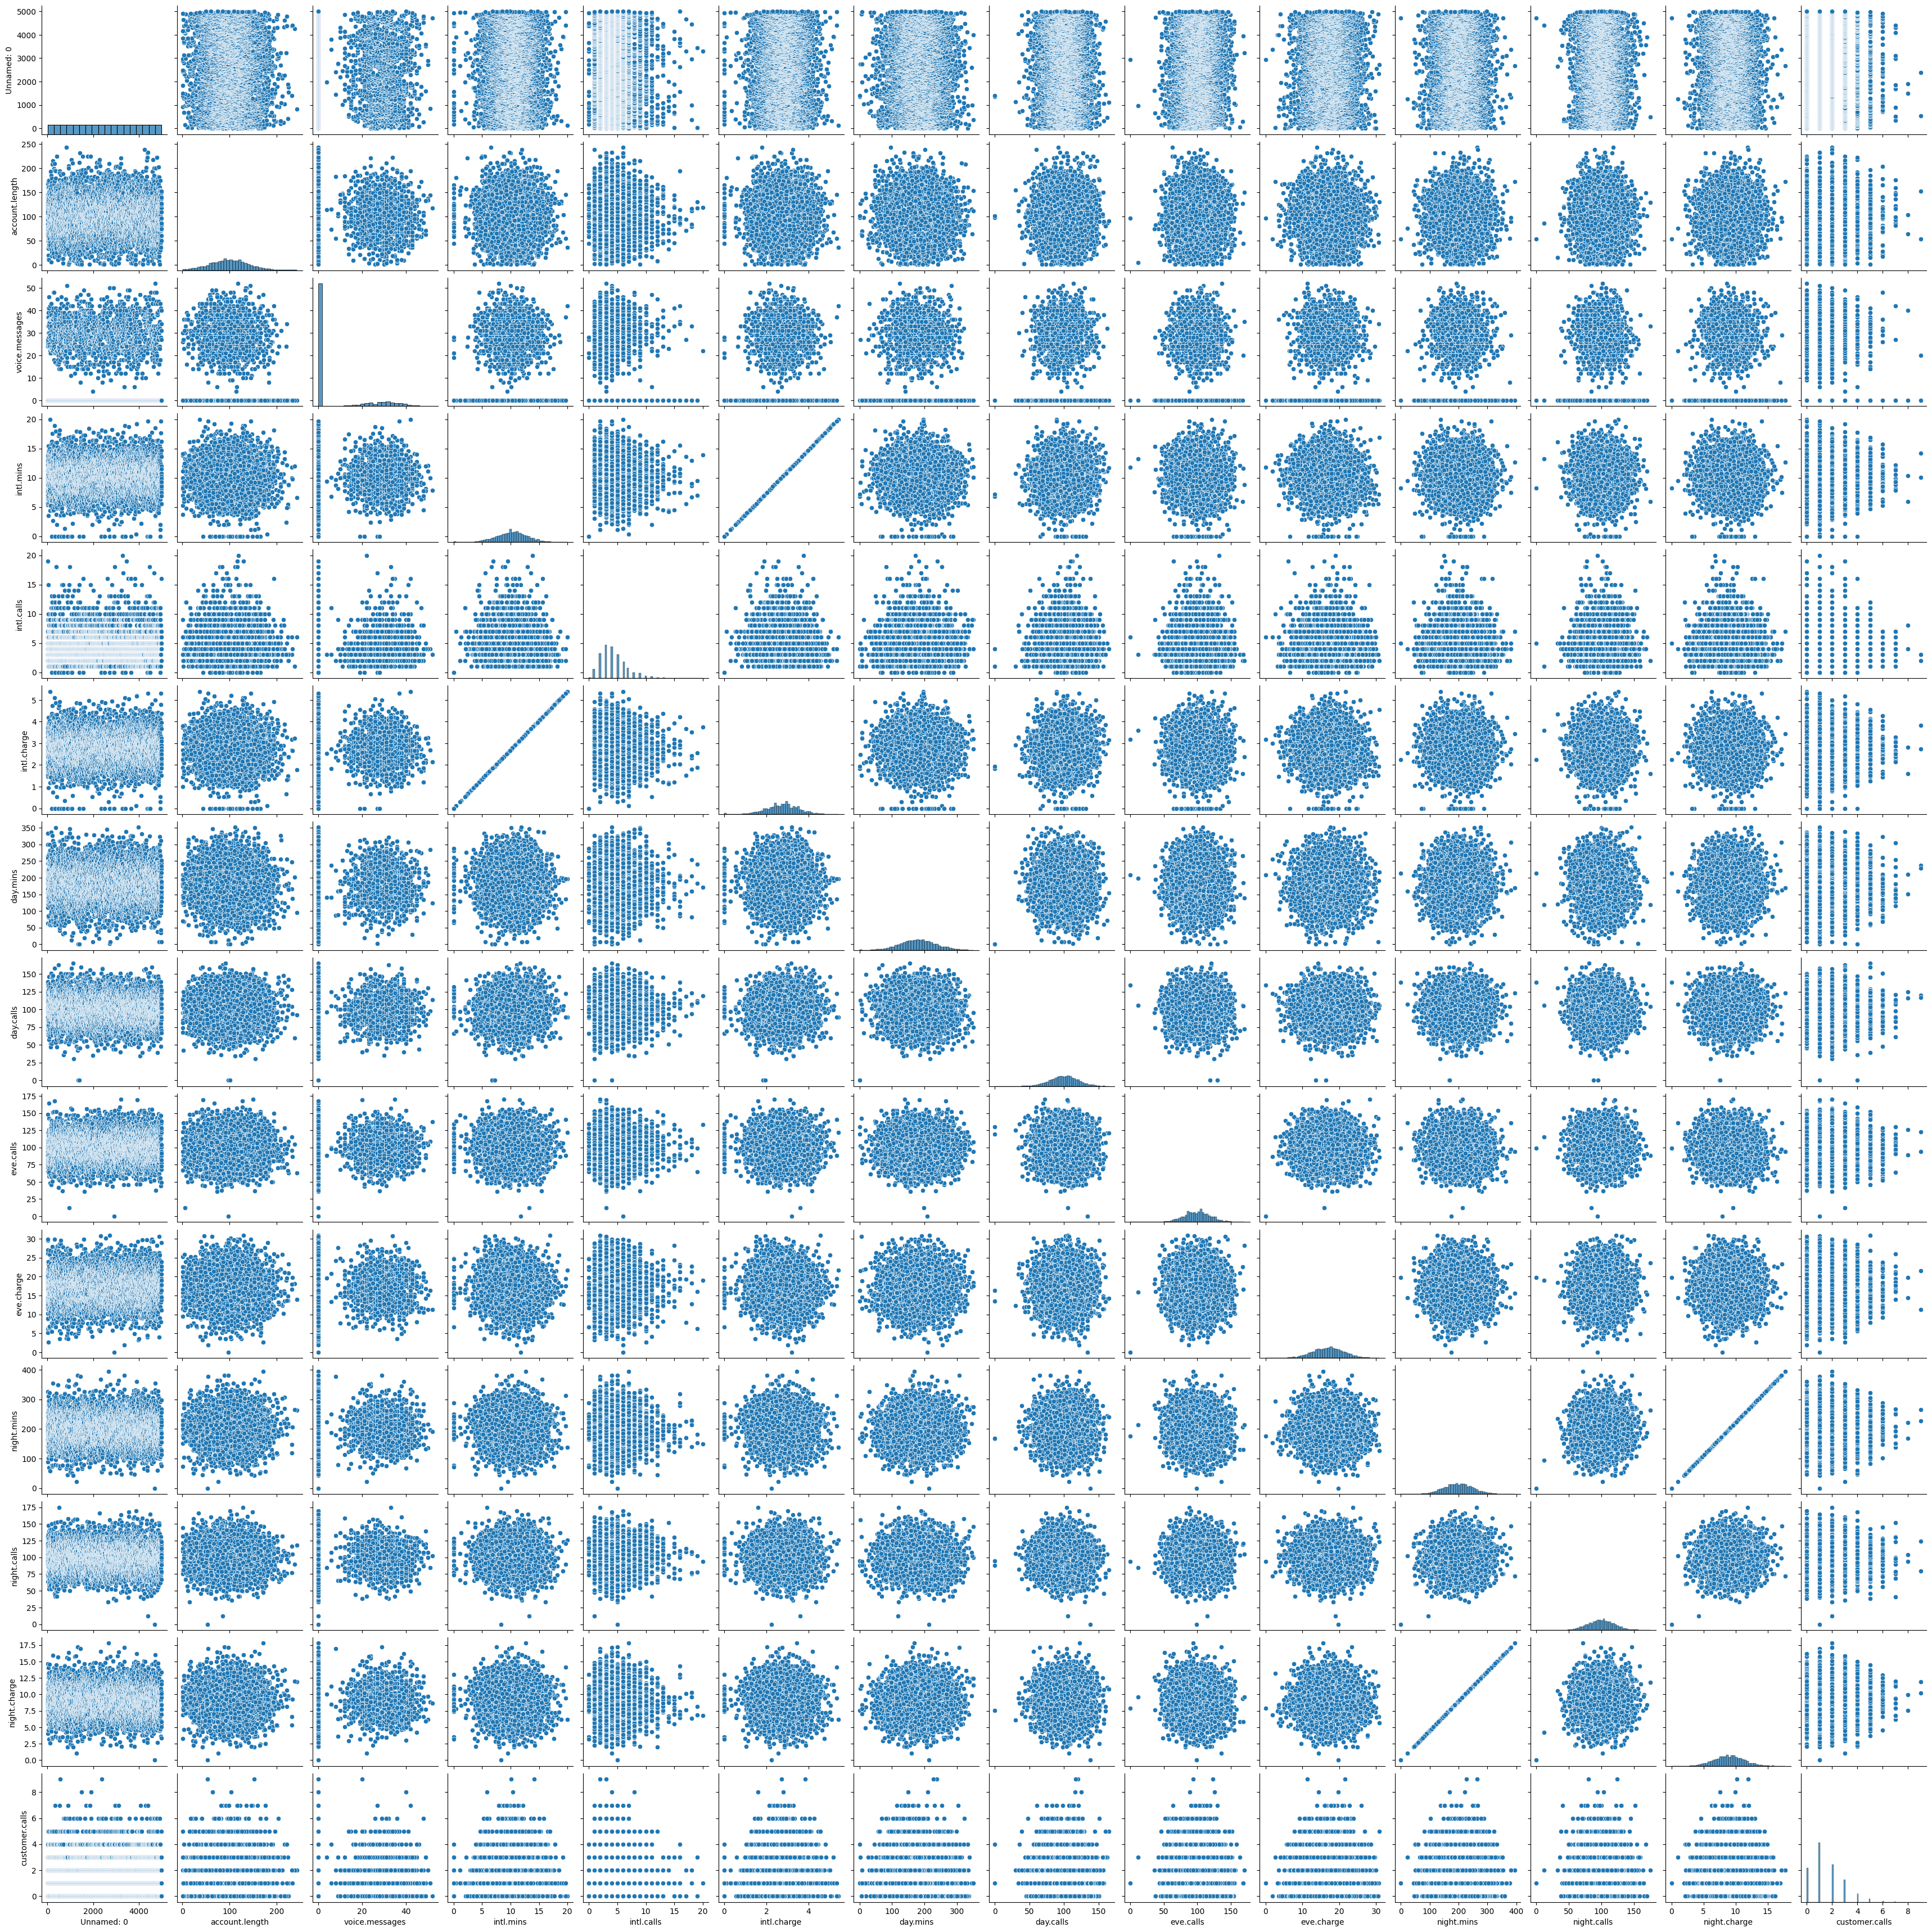

In [15]:
plt.figure(figsize=(10, 15))
sns.pairplot(data)
plt.show()


Feature Engineering

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
# Label Encoding binary columns (yes/no)
data['voice.plan'] = data['voice.plan'].map({'yes': 1, 'no': 0})
data['intl.plan'] = data['intl.plan'].map({'yes': 1, 'no': 0})

# Encoding 'state' using LabelEncoder
label_enc = LabelEncoder()
data['state'] = label_enc.fit_transform(data['state'])

# Check for missing values
print(data.isnull().sum())


Unnamed: 0        0
state             0
area.code         0
account.length    0
voice.plan        0
voice.messages    0
intl.plan         0
intl.mins         0
intl.calls        0
intl.charge       0
day.mins          0
day.calls         0
day.charge        0
eve.mins          0
eve.calls         0
eve.charge        0
night.mins        0
night.calls       0
night.charge      0
customer.calls    0
churn             0
dtype: int64


In [18]:
# Check if 'area.code' column still exists before trying to create dummies
if 'area.code' in data.columns:
    # Convert area code columns to numeric using get_dummies
    area_code_dummies = pd.get_dummies(data['area.code'], prefix='area_code')
    # Concatenate dummy variables with the original dataframe and drop the original column
    data = pd.concat([data, area_code_dummies], axis=1)
    data = data.drop('area.code', axis=1)

# Separate features and target AFTER creating dummies
X = data.drop('churn', axis=1)  # Features
y = data['churn']  # Target variable (1 = churn, 0 = loyal)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Check the shapes of the train and test sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


# Apply StandardScaler to scale numeric features
scaler = StandardScaler()
# Ensure you are fitting and transforming on the correct data (with dummies)
X_train_scaled = scaler.fit_transform(X_train)  # Fit on training data
X_test_scaled = scaler.transform(X_test)  # Transform test data
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")

X_train shape: (4000, 22)
X_test shape: (1000, 22)
y_train shape: (4000,)
y_test shape: (1000,)
X_train_scaled shape: (4000, 22)
X_test_scaled shape: (1000, 22)


Model Buliding

Logistic Regression

In [19]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Impute missing values using the mean strategy
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both train and test data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Apply StandardScaler after imputation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)





In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Logistic Regression model
log_model = LogisticRegression(max_iter=400, random_state=42)
log_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_log = log_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_log)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_log))


Logistic Regression Accuracy: 0.8690
Classification Report:
               precision    recall  f1-score   support

          no       0.89      0.97      0.93       861
         yes       0.57      0.24      0.34       139

    accuracy                           0.87      1000
   macro avg       0.73      0.61      0.63      1000
weighted avg       0.84      0.87      0.85      1000



In [21]:
from sklearn.model_selection import GridSearchCV

# Set the parameter grid for tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Regularization types
    'solver': ['liblinear']  # Solver for l1 and l2 penalties
}

# Create the Logistic Regression model
log_model = LogisticRegression(max_iter=400, random_state=42)

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(log_model, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}


In [22]:
# Train the best Logistic Regression model
best_log_model = LogisticRegression(**best_params, random_state=42)
best_log_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_best_log = best_log_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_best_log)
print(f"Best Logistic Regression Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_best_log))


Best Logistic Regression Accuracy: 0.8730
Classification Report:
               precision    recall  f1-score   support

          no       0.89      0.98      0.93       861
         yes       0.62      0.23      0.34       139

    accuracy                           0.87      1000
   macro avg       0.75      0.60      0.63      1000
weighted avg       0.85      0.87      0.85      1000



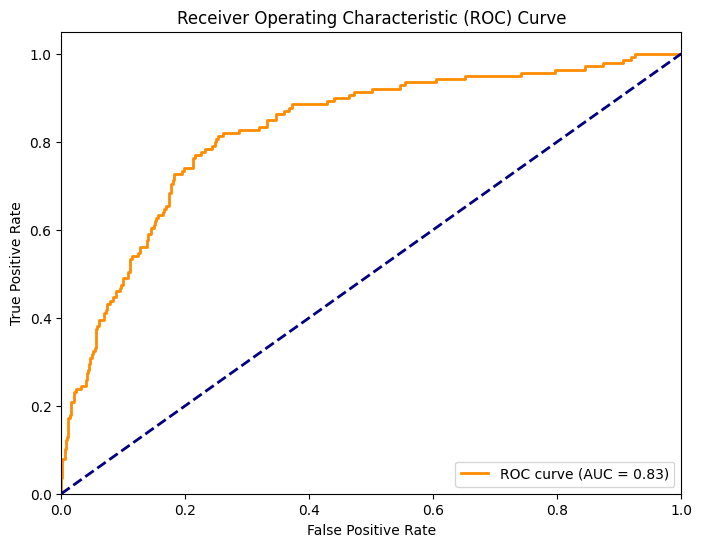

In [23]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class (churn = 1)
y_probs_log = best_log_model.predict_proba(X_test_scaled)[:, 1]

# Assuming 'yes' is the positive class
# Replace 'yes' and 'no' with 1 and 0 respectively in y_test
y_test_numeric = [1 if value == 'yes' else 0 for value in y_test]

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test_numeric, y_probs_log) # Use y_test_numeric
roc_auc = roc_auc_score(y_test_numeric, y_probs_log) # Use y_test_numeric


# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

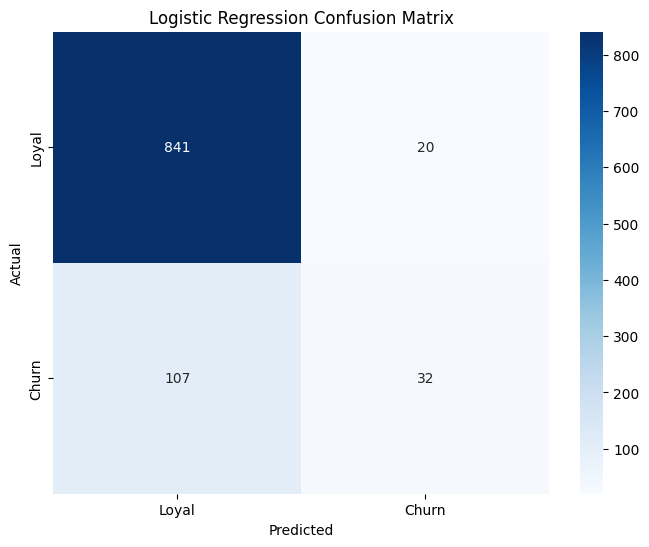

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_best_log)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Loyal', 'Churn'], yticklabels=['Loyal', 'Churn'])
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [25]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(best_log_model, X_train_scaled, y_train, cv=5, scoring='accuracy')

# Output the cross-validation scores and their mean
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Score: {cv_scores.mean():.4f}")


Cross-Validation Scores: [0.86875 0.86125 0.86125 0.8675  0.85875]
Mean Cross-Validation Score: 0.8635


In [26]:
# Final evaluation metrics for Logistic Regression
accuracy = accuracy_score(y_test, y_pred_best_log)
precision = precision_score(y_test, y_pred_best_log, pos_label='yes')
recall = recall_score(y_test, y_pred_best_log, pos_label='yes')
f1 = f1_score(y_test, y_pred_best_log, pos_label='yes')
# roc_auc = roc_auc_score(y_test_numeric, y_probs_log)
print(f"Final Logistic Regression Metrics:\n")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}") #

Final Logistic Regression Metrics:

Accuracy: 0.8730
Precision: 0.6154
Recall: 0.2302
F1 Score: 0.3351
ROC-AUC Score: 0.8273


KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train the KNN model with default parameters
knn_model = KNeighborsClassifier(n_neighbors=5)  # K=5 by default
knn_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy (K=5): {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_knn))


KNN Accuracy (K=5): 0.8900
Classification Report:
               precision    recall  f1-score   support

          no       0.90      0.98      0.94       861
         yes       0.73      0.33      0.46       139

    accuracy                           0.89      1000
   macro avg       0.82      0.66      0.70      1000
weighted avg       0.88      0.89      0.87      1000



In [28]:
from sklearn.model_selection import GridSearchCV

# Set the parameter grid for tuning
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Different values of K
    'weights': ['uniform', 'distance'],  # Uniform or weighted votes
    'metric': ['euclidean', 'manhattan']  # Distance metric
}

# Create the KNN model
knn_model = KNeighborsClassifier()

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_response.py", line 211, in _get_response_values
    y_pred = prediction_method

Best parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:1103: UserWarning: One or more of the test scores are non-finite: [0.88475 0.88475 0.881   0.881   0.88075 0.88075 0.87975 0.87975 0.87775
 0.87775     nan 0.887       nan 0.8865      nan 0.883       nan 0.879
     nan 0.87675]
  warnings.warn(


In [29]:
# Train the best KNN model using the best parameters found
best_knn_model = KNeighborsClassifier(**best_params)
best_knn_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_best_knn = best_knn_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_best_knn)
print(f"Best KNN Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_best_knn))


Best KNN Accuracy: 0.8980
Classification Report:
               precision    recall  f1-score   support

          no       0.91      0.98      0.94       861
         yes       0.78      0.37      0.50       139

    accuracy                           0.90      1000
   macro avg       0.85      0.68      0.72      1000
weighted avg       0.89      0.90      0.88      1000



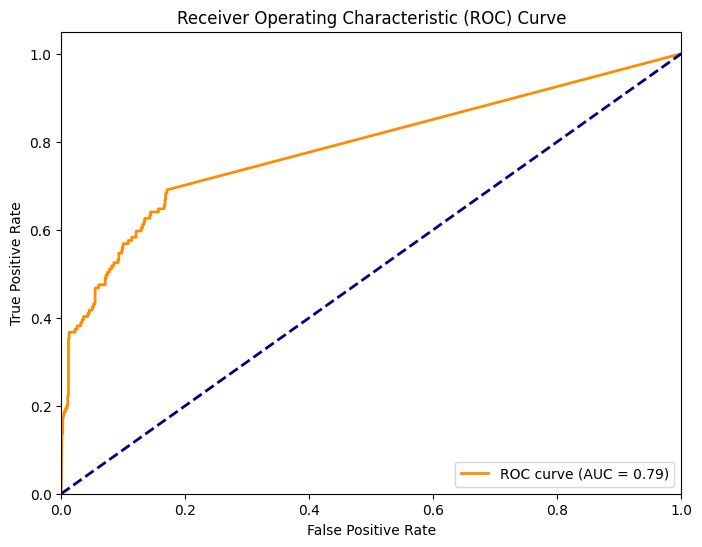

In [30]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class (churn = 1)
y_probs_knn = best_knn_model.predict_proba(X_test_scaled)[:, 1]

# Assuming 'yes' is the positive label
# Replace 'yes' and 'no' with 1 and 0 respectively in y_test
y_test_numeric = [1 if label == 'yes' else 0 for label in y_test]

# Compute ROC curve and AUC score using the numeric target variable
fpr, tpr, thresholds = roc_curve(y_test_numeric, y_probs_knn)
roc_auc = roc_auc_score(y_test_numeric, y_probs_knn)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

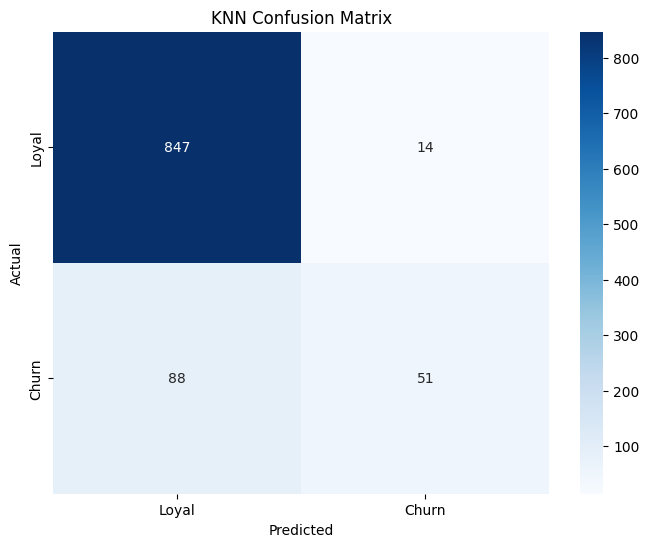

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_best_knn)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Loyal', 'Churn'], yticklabels=['Loyal', 'Churn'])
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [32]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(best_knn_model, X_train_scaled, y_train, cv=5, scoring='accuracy')

# Output the cross-validation scores and their mean
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Score: {cv_scores.mean():.4f}")


Cross-Validation Scores: [0.8975  0.88875 0.8975  0.875   0.87625]
Mean Cross-Validation Score: 0.8870


In [33]:
# Final evaluation metrics for KNN
accuracy = accuracy_score(y_test, y_pred_best_knn)
# Specify 'yes' as the positive label
precision = precision_score(y_test, y_pred_best_knn, pos_label='yes')
recall = recall_score(y_test, y_pred_best_knn, pos_label='yes')
f1 = f1_score(y_test, y_pred_best_knn, pos_label='yes')
roc_auc = roc_auc_score(y_test, y_probs_knn) # Assuming roc_auc_score can handle probabilities or numeric labels

print(f"Final KNN Metrics:\n")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

Final KNN Metrics:

Accuracy: 0.8980
Precision: 0.7846
Recall: 0.3669
F1 Score: 0.5000
ROC-AUC Score: 0.7863


Random Forest Classifier

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns


In [35]:
# Create a Random Forest Classifier with 100 trees
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [36]:
# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_scaled)


Random Forest Accuracy: 0.9610
Classification Report:
               precision    recall  f1-score   support

          no       0.96      0.99      0.98       861
         yes       0.93      0.78      0.85       139

    accuracy                           0.96      1000
   macro avg       0.95      0.88      0.91      1000
weighted avg       0.96      0.96      0.96      1000



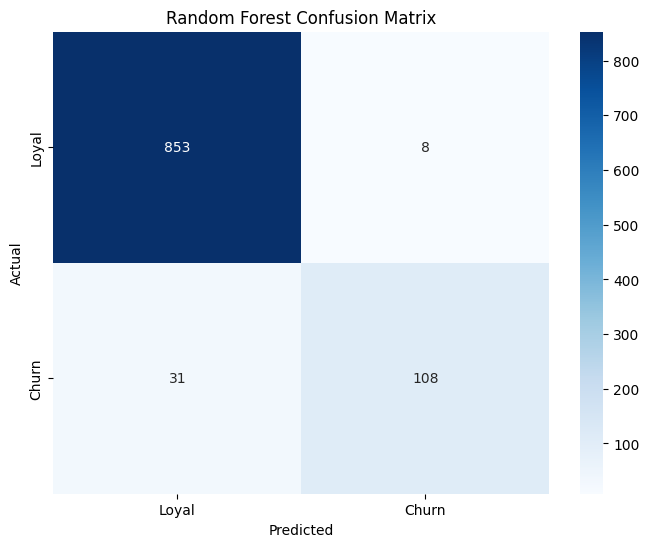

In [37]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy:.4f}")

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Loyal', 'Churn'], yticklabels=['Loyal', 'Churn'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


ROC-AUC Score: 0.9181


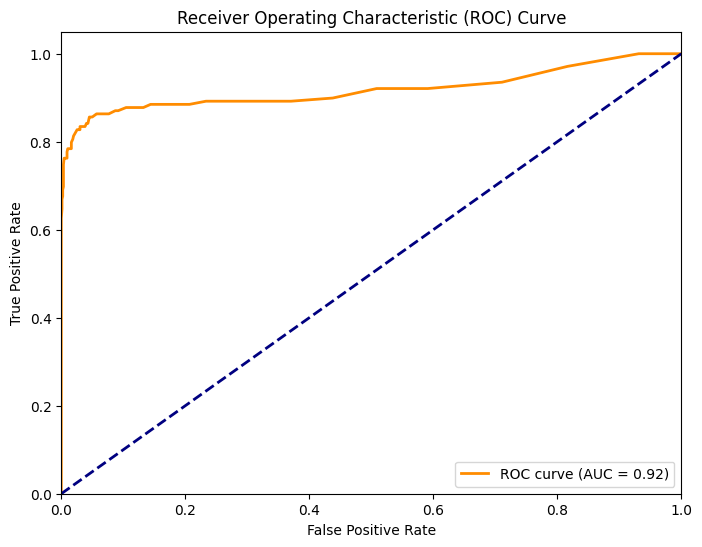

In [38]:
from sklearn.metrics import roc_curve

# Get predicted probabilities for the positive class (churn = 1)
y_probs_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

# Calculate the ROC-AUC score
roc_auc = roc_auc_score(y_test, y_probs_rf)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs_rf, pos_label='yes')

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


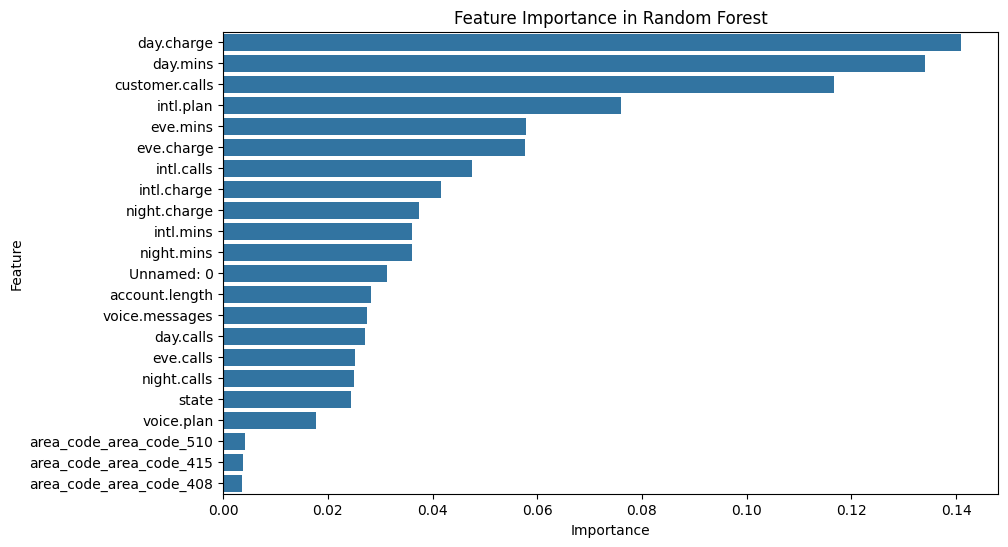

In [39]:
# Get feature importances from the Random Forest model
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importance
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance in Random Forest')
plt.show()


In [40]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='accuracy')

# Output the cross-validation scores
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Score: {cv_scores.mean():.4f}")


Cross-Validation Scores: [0.9625  0.9525  0.95125 0.9575  0.95375]
Mean Cross-Validation Score: 0.9555
